In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Dataset**

In [657]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [658]:
print(df.shape)

(303, 14)


In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [660]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [661]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

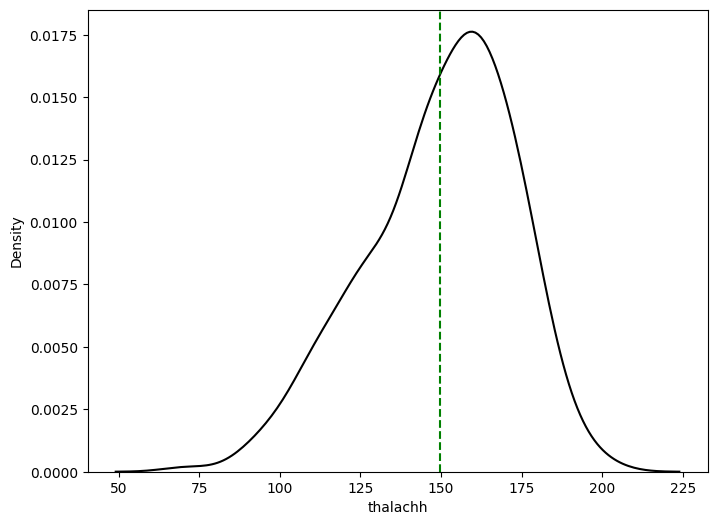

In [662]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(df["thalachh"], ax=ax, color= "black")
ax.axvline(df["thalachh"].mean(), color="g", ls="--")

plt.show()

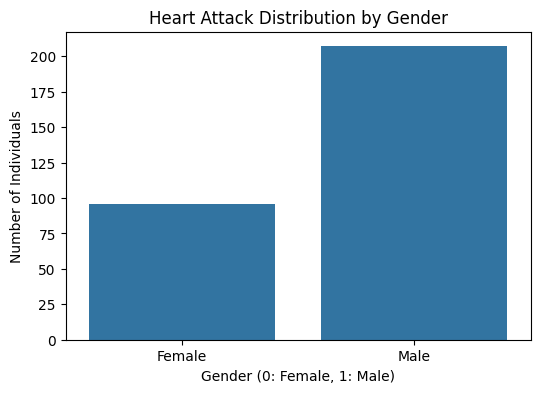

In [663]:
sex_counts = df["sex"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Tittle
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Number of Individuals")
plt.title("Heart Attack Distribution by Gender")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])

plt.show()

<Axes: xlabel='age', ylabel='chol'>

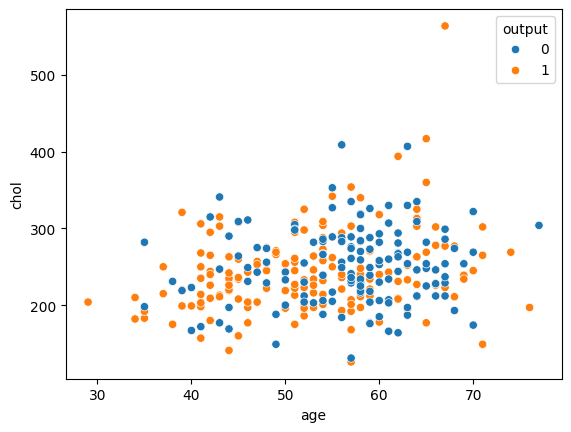

In [664]:
sns.scatterplot(x = "age", y = "chol", hue="output", data=df)

In [665]:
# Thalesemia should not be 0
df["thall"].unique() 

array([1, 2, 3, 0], dtype=int64)

In [666]:
df[df["thall"] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [667]:
df["thall"]= df["thall"].replace(0,np.nan)

In [668]:
df["thall"] = df["thall"].fillna(2)

In [669]:
df["thall"].unique()

array([1., 2., 3.])

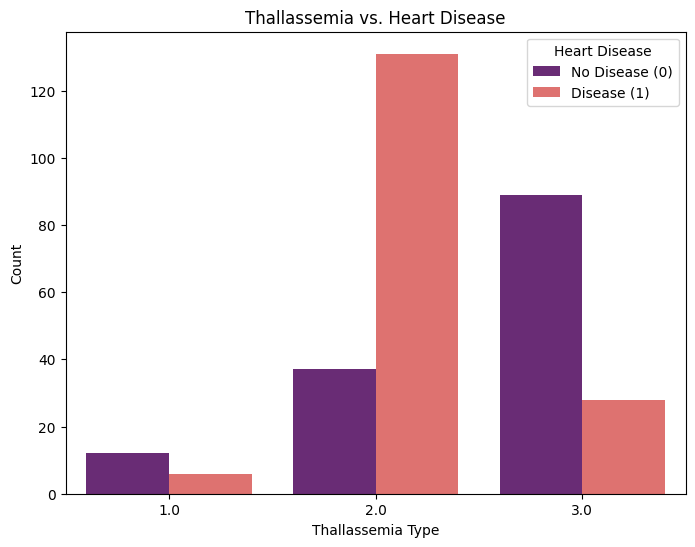

In [670]:
plt.figure(figsize=(8, 6))
sns.countplot(x="thall", hue="output", data=df, palette="magma")

plt.xlabel("Thallassemia Type")
plt.ylabel("Count")
plt.title("Thallassemia vs. Heart Disease")
plt.legend(title="Heart Disease", labels=["No Disease (0)", "Disease (1)"])
plt.show()

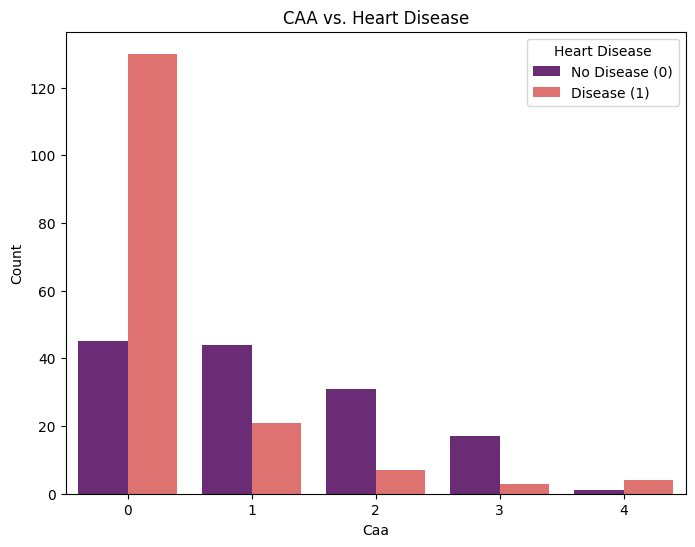

In [671]:
plt.figure(figsize=(8, 6))
sns.countplot(x="caa", hue="output", data=df, palette="magma")

plt.xlabel("Caa")
plt.ylabel("Count")
plt.title("CAA vs. Heart Disease")
plt.legend(title="Heart Disease", labels=["No Disease (0)", "Disease (1)"])
plt.show()

### **Train Test Split**

In [672]:
X = df.drop("output", axis=1)
y = df["output"]

In [673]:
from sklearn.model_selection import train_test_split

In [674]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

##### **Standart Scaler**

In [675]:
from sklearn.preprocessing import StandardScaler

In [676]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### **Logistic Regression**

In [677]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [727]:
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train, y_train)

LogisticRegression()

In [728]:
y_pred = log_reg.predict(scaled_X_test)

In [ ]:
accuracy = round(accuracy_score(y_pred, y_test),3)
print(f"Accuracy Score : {accuracy}")

Accuracy Score : 0.857


#### **Hyperparameter Optimization (with GridSearchCV)**

In [681]:
log_reg_2 = LogisticRegression()

In [ ]:
params = {
    "max_iter" : [100, 200 ,300, 500, 1000],
    "penalty" : ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

In [683]:
from sklearn.model_selection import GridSearchCV

In [684]:
log_reg_grid = GridSearchCV(log_reg_2, param_grid=params)

In [685]:
log_reg_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [686]:
best_params = log_reg_grid.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


##### - Best Logistic Regression

In [687]:
# We can continue with our grid model if we want, but I will create a final logistic regression model with the best effect

best_log_regr = LogisticRegression(max_iter=100, penalty="l1", solver="liblinear")
best_log_regr.fit(scaled_X_train, y_train)

best_pred = best_log_regr.predict(scaled_X_test)

In [688]:
print(classification_report(best_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.89      0.88      0.88        56

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



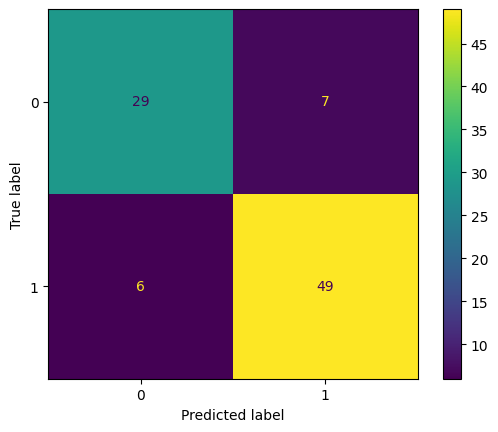

In [689]:
ConfusionMatrixDisplay.from_estimator(best_log_regr, scaled_X_test, y_test)

### **Decision Tree**

In [690]:
from sklearn.tree import DecisionTreeClassifier

In [698]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [699]:
dec_pred = dec_tree.predict(X_test)

In [700]:
print(classification_report(dec_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        39
           1       0.73      0.77      0.75        52

    accuracy                           0.70        91
   macro avg       0.70      0.69      0.69        91
weighted avg       0.70      0.70      0.70        91



### **Random Forest**

In [701]:
from sklearn.ensemble import RandomForestClassifier

In [703]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [704]:
rand_pred = rand_forest.predict(X_test)

In [705]:
print(classification_report(rand_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        34
           1       0.85      0.82      0.84        57

    accuracy                           0.80        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.81      0.80      0.80        91



#### **Hyperparameter Optimization (with GridSearchCV)**

In [ ]:
rand_forest_2 = RandomForestClassifier() 

In [708]:
paramss = {
    "n_estimators" : [100, 200 ,300, 400, 500],
    "criterion" : ['gini', 'entropy', 'log_loss']
    }

In [ ]:
rand_grid = GridSearchCV(estimator=
                           rand_forest_2,
                           param_grid=paramss,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [713]:
rand_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [717]:
best_params = rand_grid.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'n_estimators': 300}


##### - Best Random Forest

In [718]:
best_rand = RandomForestClassifier(n_estimators=300, criterion="entropy")
best_rand.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [719]:
best_rand_pred = best_rand.predict(X_test)

In [721]:
print(classification_report(best_rand_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        36
           1       0.84      0.84      0.84        55

    accuracy                           0.80        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91



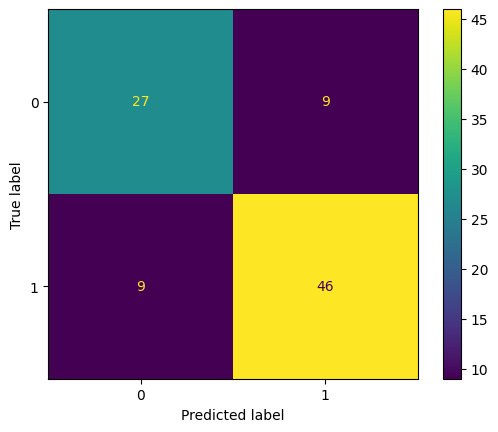

In [720]:
ConfusionMatrixDisplay.from_estimator(best_rand, X_test, y_test)

### **SVM Model**

In [722]:
from sklearn.svm import SVC

In [723]:
svc_model = SVC()
svc_model.fit(scaled_X_train, y_train)

SVC()

In [724]:
svc_pred = svc_model.predict(scaled_X_test)

In [725]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.87      0.87      0.87        55

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



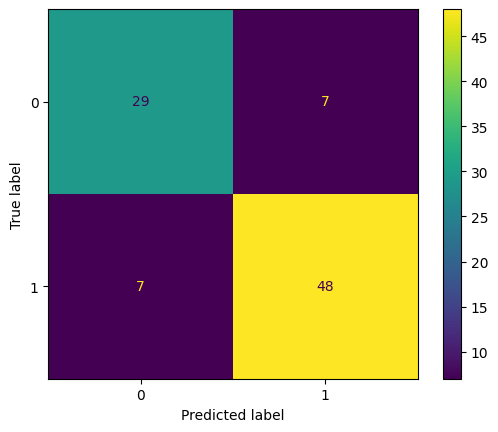

In [726]:
ConfusionMatrixDisplay.from_estimator(svc_model, scaled_X_test, y_test)

## **Best Model**

In [730]:
print("Decision Tree Classifier \n")
print(classification_report(dec_pred, y_test))

Decision Tree Classifier 

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        39
           1       0.73      0.77      0.75        52

    accuracy                           0.70        91
   macro avg       0.70      0.69      0.69        91
weighted avg       0.70      0.70      0.70        91



In [ ]:
print("Logistic Regression with Grid Search \n")
print(classification_report(best_pred, y_test))

Logistic Regression 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.89      0.88      0.88        56

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [734]:
print("Random Forest Classifier \n")
print(classification_report(best_rand_pred, y_test))

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        36
           1       0.84      0.84      0.84        55

    accuracy                           0.80        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
print("Support Vector Classifier \n")
print(classification_report(svc_pred, y_test))

Decision Tree Classifier 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.87      0.87      0.87        55

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
# Logistic Regression - SVC - Random Forest Classifier - Decision Tree Classifier

In [ ]:
# This project was developed as part of my early learning journey in machine learning.